In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mp
import random
from pandas import read_csv
from sklearn.model_selection import train_test_split

In [3]:
url = 'C:\\Users\\user\\Desktop\\ML\\PROJECT\\CTR_SampleData'
df= read_csv(url, header=0, sep='\t')

In [4]:
df['hour']=pd.to_datetime(df['hour'],format='%y%m%d%H')

In [5]:
df['day']=df['hour'].dt.day

In [6]:
df['hou']=df['hour'].dt.hour

In [7]:
df=df.drop(['hour'],axis=1)

In [8]:
df = df.rename(columns={'hou': 'hour'})

In [9]:
df=df.drop(['id'],axis=1)

In [10]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
df = convert_obj_to_int(df)

In [11]:
y=df.click
x=df.drop('click',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Feature Importance with XGBoost

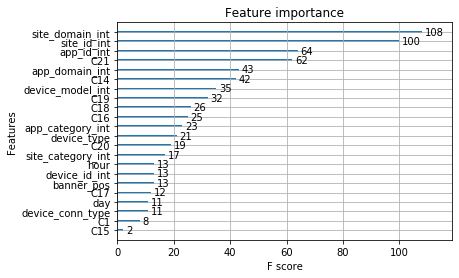

In [15]:
# plot feature importance using built-in function

from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# split data into X and y
X =x
y = y
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

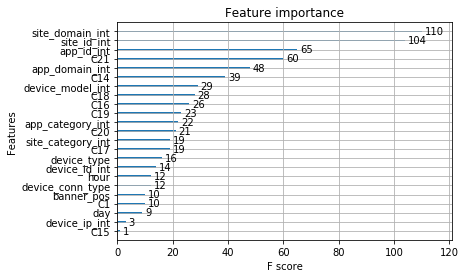

In [16]:
# plot feature importance using built-in function
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# split data into X and y
X =x_train
y =y_train
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

### Imbalanced dataset

In [17]:
# Oversampling imbalanced training data with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

X=x_train
y=y_train
# count class(click 0 and 1) dist.
counter = Counter(y)
print(counter)

#  new class dist
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)



Using TensorFlow backend.


Counter({0: 581064, 1: 118936})
Counter({1: 581064, 0: 581064})


In [18]:
# Oversampling imbalanced training data with SMOTE and random undersample
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X=x_train
y=y_train

counter = Counter(y)
print(counter)

over_samp = SMOTE(sampling_strategy=0.3)
under_samp = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over_samp), ('u', under_samp)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)

counter = Counter(y)
print(counter)


Counter({0: 581064, 1: 118936})
Counter({0: 348638, 1: 174319})


**Borderline-SMOTE** for imbalanced dataset:

In [ ]:
# borderline-SMOTE with SVM 
from collections import Counter
from imblearn.over_sampling import SVMSMOTE

X=x_train
y=y_train
counter = Counter(y)
print(counter)

oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 581064, 1: 118936})


**Adaptive Synthetic Sampling (ADASYN)**

In [19]:
# Oversample with ADASYN
from collections import Counter
from imblearn.over_sampling import ADASYN

X=x_train
y=y_train
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 581064, 1: 118936})
Counter({0: 581064, 1: 563456})


### Regressions:

**Ridge Regression**

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model measured as the sum squared value of the coefficient values (also called the l2-norm).

In [12]:
# Ridge Regression
from sklearn import model_selection
from sklearn.linear_model import Ridge

X = x_train
Y = y_train
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = Ridge()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.29781e-40): result may not be accurate.
  overwrite_a=True).T
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.31785e-40): result may not be accurate.
  overwrite_a=True).T
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.33828e-40): result may not be accurate.
  overwrite_a=True).T
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.34012e-40): result may not be accurate.
  overwrite_a=True).T
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.31409e-40): result may not be accurate.
  overwrite_a=True).T
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.p

-0.1359192916434851


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.33401e-40): result may not be accurate.
  overwrite_a=True).T


**LASSO Regression**

The Least Absolute Shrinkage and Selection Operator (or LASSO for short) is a modification of linear regression, like ridge regression, where the loss function is modified to minimize the complexity of the model measured as the sum absolute value of the coefficient values (also called the l1-norm).

In [13]:
# Lasso Regression
from sklearn import model_selection
from sklearn.linear_model import Lasso
X = x_train
Y = y_train
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = Lasso()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41665.80324821599, tolerance: 8.901108914126544
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41851.077398432666, tolerance: 8.887121827142227
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40557.011325443964, tolerance: 8.895172742698392
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40

-0.13737951848352228


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41642.913069511604, tolerance: 8.90137268428572
  positive)


**ElasticNet Regression**

ElasticNet is a form of regularization regression that combines the properties of both Ridge Regression and LASSO regression. It seeks to minimize the complexity of the regression model (magnitude and number of regression coefficients) by penalizing the model using both the l2-norm (sum squared coefficient values) and the l1-norm (sum absolute coefficient values).

In [14]:
# ElasticNet Regression
from sklearn import model_selection
from sklearn.linear_model import ElasticNet

X = x_train
Y = y_train
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = ElasticNet()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42080.27434699688, tolerance: 8.901108914126544
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42197.131858053195, tolerance: 8.887121827142227
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41472.311422509, tolerance: 8.895172742698392
  positive)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42313

-0.1368788338084886


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41848.05554790058, tolerance: 8.90137268428572
  positive)


**Classification and Regression Trees**

Decision trees or the Classification and Regression Trees (CART as they are known) use the training data to select the best points to split the data in order to minimize a cost metric. The default cost metric for regression decision trees is the mean squared error, specified in the criterion parameter.

In [15]:
# Decision Tree Regression
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor

X = x_train
Y = y_train
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-0.25485000727957885


### dimensionality reduction

**Principal Component Analysis**

Principal Component Analysis, or PCA, might be the most popular technique for dimensionality reduction with dense data (few zero values).

In [18]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

X = x_train
y = y_train
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.445 (0.002)


**Singular Value Decomposition**

Singular Value Decomposition, or SVD, is one of the most popular techniques for dimensionality reduction for sparse data (data with many zero values).

In [19]:
# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

X = x_train
y = y_train
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.818 (0.001)


**Linear Discriminant Analysis**

Linear Discriminant Analysis, or LDA, is a multi-class classification algorithm that can be used for dimensionality reduction.

The number of dimensions for the projection is limited to 1 and C-1, where C is the number of classes. In this case, our dataset is a binary classification problem (two classes), limiting the number of dimensions to 1.

In [20]:
# evaluate lda with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

X = x_train
y = y_train
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=1)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.828 (0.000)
